In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
datos, metadatos = tfds.load("mnist", as_supervised = True, with_info = True)

In [4]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [5]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [6]:
nombres_clases = metadatos.features["label"].names

In [7]:
# Normalizacion
# Al tratar con imagenes cada pixel tiene un valor de 0 a 255 (0 negro, 255 blanco)
# Transformar para que en vez de 0 a 255 sea de 0 a 1 (0 =0 y 255 = 1) o sea 127 = .5

# Normalizar los datos de ent y pruebas con una funcion

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

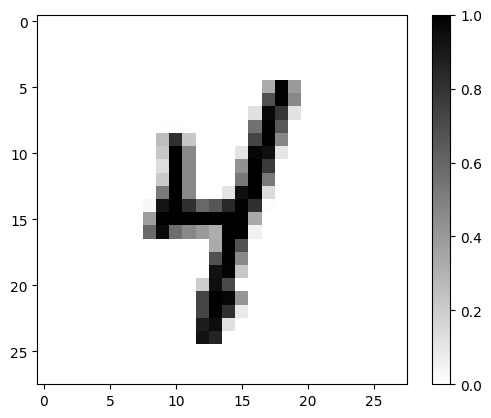

In [8]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

#MOstrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

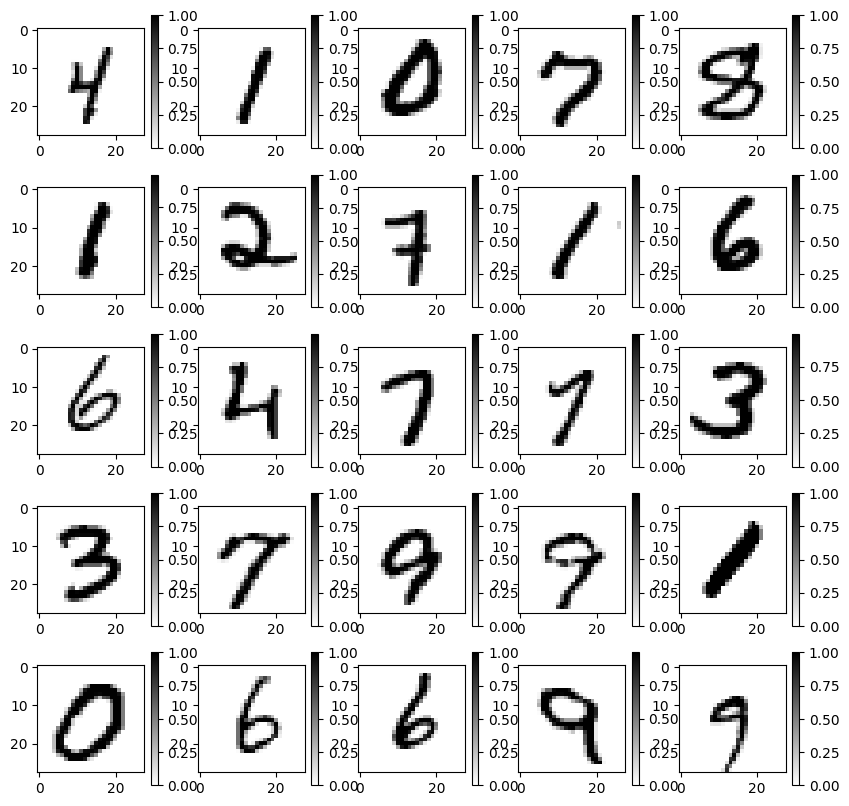

In [9]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.colorbar()

plt.show()

In [10]:
# Hacemos nuestro modelo
modelo = tf.keras.Sequential([
    #784 datos de entrada (ya que las imagenes son de 28*28 pixeles)
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # 28 el tamano de los pixeles y 1 porque es blanco o negro
    tf.keras.layers.Dense(50, activation = tf.nn.relu), # Capa oculta (todas las  capas que no son entrada o salida son las ocultas)
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    #Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Solo ativamos una sola neurona las otras tiene numeor muy chicos y la que queremos numero muy grande

])

In [11]:
modelo.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [12]:
# Pre procesamiento adicional
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_prueba = datos_pruebas.batch(TAMANO_LOTE)

In [13]:
import math

#Entrenamos
entrenamiento = modelo.fit(
    datos_entrenamiento, epochs = 10,
    steps_per_epoch = math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2991 - accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1424 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1043 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0712 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0515 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03